In [1]:
# Here, we're going to show two different ways of setting up a circuit to have qubits in a certain state
# qc0 will use traditional quantum gates on qubits in the ground state
# qc1 will use the generic Initialization function that takes in a list of amplitudes

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc0 = QuantumCircuit(q, c)
qc1 = QuantumCircuit(q, c)

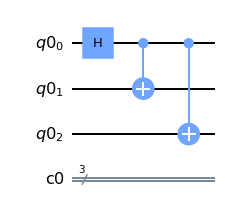

In [2]:
qc0.h(q[0])
qc0.cx(q[0], q[1])
qc0.cx(q[0], q[2])
qc0.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector
psi0 = Statevector(qc0)
psi0.draw('latex') # we can see if q0 is 1, then the other two qubits flip as well

<IPython.core.display.Latex object>

In [4]:
# let's now try to construct the same state using initialization function
from math import sqrt
ampl = [sqrt(2)/2,0,0,0,0,0,0,sqrt(2)/2]

In [5]:
qc1.initialize(ampl, [q[0], q[1], q[2]])

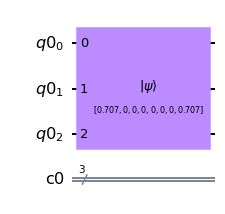

In [6]:
qc1.draw('mpl')

In [7]:
# let's measure both circuits at once
qc0.measure(q[0], c[0])
qc0.measure(q[1], c[1])
qc0.measure(q[2], c[2])

qc1.measure(q[0], c[0])
qc1.measure(q[1], c[1])
qc1.measure(q[2], c[2])

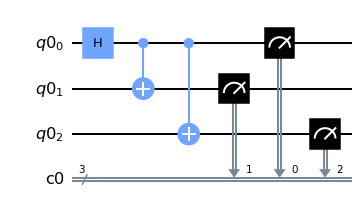

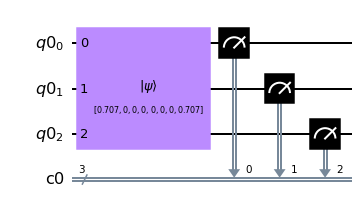

In [8]:
display(qc0.draw('mpl'), qc1.draw('mpl'))

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()

qc_list = [qc0, qc1]
qc_compiled = transpile(qc_list, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'111': 503, '000': 521}, {'000': 493, '111': 531}]


/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


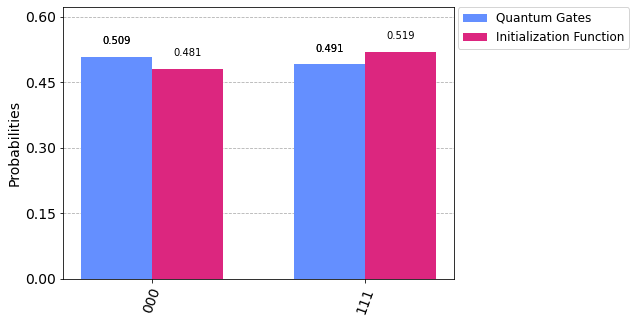

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, legend=['Quantum Gates', 'Initialization Function'])